In [1]:
from scipy import stats
import numpy as np

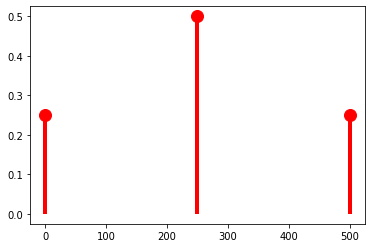

(array([24.,  0.,  0.,  0.,  0., 41.,  0.,  0.,  0., 35.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

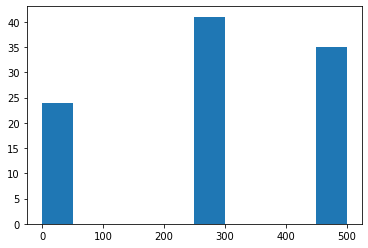

In [53]:
xk = [0, 250, 500]
pk = (.25, .5, .25)

def get_dist(xk, pk):
    return stats.rv_discrete(name='custm', values=(xk, pk))

custm = get_dist(xk, pk)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

R = custm.rvs(size=100)
plt.hist(R)



In [55]:
custm.rvs()

250

In [2]:
import sqlite3
con = sqlite3.connect("db.sqlite3")
cur = con.cursor()

for row in cur.execute('SELECT * from rounds_order'):
    print(row)
print([x[0] for x in cur.description])
# Be sure to close the connection
con.close()

(1, 1, '18', 10, 0, 0, 40, 18)
(2, -1, '16', 10, 0, 0, 41, 18)
(3, 1, '16', 10, 10, 0, 46, 21)
(4, -1, '18', 12, 10, 0, 47, 21)
(5, -1, '30', 1, 1, 0, 48, 22)
(6, 1, '30', 1, 1, 0, 49, 22)
(7, -1, '33', 32, 0, 1, 50, 23)
['id', 'order_type', 'price', 'quantity', 'quantity_final', 'is_buy_in', 'player_id', 'group_id']


In [38]:
import pandas as pd
import contextlib

def get_df_for_q(q):
    with contextlib.closing(sqlite3.connect("db.sqlite3")) as con:
        df = pd.read_sql(q, con)

    return df

#get_df_for_q('SELECT * FROM rounds_player WHERE session_id = 6')

get_df_for_q('''
SELECT o.*, p.id_in_group, p.round_number, p.session_id , p.shares_transacted
FROM rounds_player p JOIN rounds_order o ON p.id = o.player_id 
WHERE p.session_id = 6''' )

#get_df_for_q('select * from sqlite_master where type="table"')


,id,order_type,price,quantity,quantity_final,is_buy_in,player_id,group_id,id_in_group,round_number,session_id,shares_transacted
0,8,-1,1540,3,0,1,59,27,2,2,6,0
1,9,1,2000,5,1,0,60,28,1,3,6,-1
2,10,-1,2200,3,3,1,61,28,2,3,6,5
3,11,-1,2200,1,1,1,61,28,2,3,6,5
4,12,-1,2200,1,1,1,61,28,2,3,6,5
